In [1]:
import pandas as pd
import logging
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from nst_scraper import nst_on_ice_scraper

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Set pandas to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [2]:
def filter_players_by_toi(df, min_toi=400):
    """
    Filters the input DataFrame to include only players with a total time on ice (toi) of at least min_toi.

    Parameters:
        df (pd.DataFrame): The DataFrame containing player statistics.
        min_toi (int, optional): The minimum total time on ice required to include a player. Defaults to 400.

    Returns:
        pd.DataFrame: A filtered DataFrame with players having toi >= min_toi.
    """
    filtered_df = df[df['toi'] >= min_toi]
    return filtered_df


In [4]:
def process_player_stats(season, startdate='', enddate='', sit='all', stdoi='std', pos='std', loc='B', rate='y', min_toi=400):
    """
    Processes player statistics for a given season by scraping data, filtering players by TOI,
    and calculating individual expected goals per 60 minutes (ixG/60).

    Parameters:
        season (int): The season year (e.g., 20222023).
        startdate (str, optional): The start date for data scraping. Defaults to ''.
        enddate (str, optional): The end date for data scraping. Defaults to ''.

    Returns:
        pd.DataFrame: A DataFrame containing the processed player statistics with the 'ixg60' column.
    """
    # Scrape player statistics for the given season
    df = nst_on_ice_scraper(
        fromseason=season,
        thruseason=season,
        startdate=startdate,
        enddate=enddate, sit=sit,
        stdoi=stdoi, pos=pos, loc=loc, rate=rate
    )
    
    # Filter players based on minimum TOI
    filtered_df = filter_players_by_toi(df, min_toi)
    
    return filtered_df

In [18]:
ind_h_df = process_player_stats(20232024, sit='5v5', stdoi='std', loc='H', min_toi=400)
ind_h_df.head()

,player,team,position,gp,toi,toi/gp,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%
0,Ryan Suter,DAL,D,41,706.083333,17.221545,0.08,0.68,0.34,0.34,0.76,26.47,4.16,2.04,0.14,9.01,6.20,2.63,0.34,0.08,0.34,0.34,0.17,0.17,0.0,0.0,0.00,1.36,0.76,3.23,3.82,2.97,0.00,0.00,-
3,Brent Burns,CAR,D,41,620.516667,15.134553,0.19,0.58,0.29,0.29,0.77,26.67,5.90,3.28,0.22,18.08,9.67,4.35,0.39,0.29,1.74,0.77,0.39,0.39,0.0,0.0,0.29,2.71,1.64,1.35,1.64,3.19,0.00,0.00,-
5,Joe Pavelski,DAL,C,41,551.950000,13.462195,0.87,1.41,0.98,0.43,2.28,67.74,8.37,10.39,0.94,13.81,11.09,8.91,5.11,0.54,1.09,0.65,0.33,0.33,0.0,0.0,0.54,2.94,1.41,3.48,2.83,3.04,16.20,14.57,5.72
7,Alex Ovechkin,WSH,L,39,560.100000,14.361538,0.86,0.64,0.64,0.00,1.50,60.87,8.57,10.00,0.94,18.85,12.96,9.64,3.96,0.86,2.14,0.86,0.43,0.43,0.0,0.0,0.43,2.04,1.61,8.89,1.71,1.07,0.00,0.21,0.00
8,Evgeni Malkin,PIT,C,41,573.166667,13.979675,0.84,1.05,0.84,0.21,1.88,78.26,6.39,13.11,0.74,12.46,9.21,7.96,3.04,0.21,0.94,2.93,1.36,1.36,0.0,0.0,2.09,2.30,4.50,0.94,3.45,2.51,19.16,20.52,5.05


In [19]:
ind_a_df = process_player_stats(20232024, sit='5v5', stdoi='std', loc='A', min_toi=400)
ind_a_df.head()

,player,team,position,gp,toi,toi/gp,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%
0,Ryan Suter,DAL,D,41,697.750000,17.018293,0.09,0.52,0.17,0.34,0.60,25.93,4.30,2.00,0.18,11.95,7.40,3.10,0.17,0.09,0.95,1.72,0.86,0.86,0.0,0.0,0.00,1.03,0.43,3.18,4.04,4.39,0.00,0.00,-
3,Brent Burns,CAR,D,41,656.166667,16.004065,0.27,0.55,0.18,0.37,0.82,26.47,6.68,4.11,0.23,21.03,11.43,4.66,0.55,0.27,2.29,0.91,0.46,0.46,0.0,0.0,0.18,1.37,1.19,1.83,1.46,3.57,0.00,0.00,-
5,Joe Pavelski,DAL,C,41,533.366667,13.008943,0.45,1.35,0.56,0.79,1.80,69.57,5.40,8.33,0.67,10.35,7.65,6.52,3.15,0.11,1.01,1.12,0.56,0.56,0.0,0.0,1.57,2.70,0.67,4.27,2.14,3.71,16.87,16.54,5.68
7,Alex Ovechkin,WSH,L,40,544.200000,13.605000,0.66,0.99,0.55,0.44,1.65,83.33,7.28,9.09,0.62,16.43,10.58,7.83,2.98,0.55,1.54,0.66,0.33,0.33,0.0,0.0,0.66,1.43,0.77,8.05,1.65,1.10,0.00,0.00,-
8,Evgeni Malkin,PIT,C,41,584.283333,14.250813,1.13,1.33,0.92,0.41,2.46,70.59,5.96,18.97,0.62,11.71,8.42,6.98,3.49,0.31,1.03,3.08,1.44,1.44,0.0,0.0,0.72,1.75,3.90,1.85,4.11,1.33,18.89,20.44,4.93


In [20]:
oi_h_df = process_player_stats(20242025, sit='5v5', stdoi='oi', loc='H', min_toi=100)
oi_h_df.head()
oi_a_df = process_player_stats(20242025, sit='5v5', stdoi='oi', loc='A', min_toi=100)
oi_a_df.head()


,player,team,position,gp,toi,toi/gp,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%
0,Ryan Suter,STL,D,16,321.050000,20.065625,55.13,62.61,46.83,38.50,45.79,45.68,28.97,29.53,49.52,2.43,2.62,48.15,2.17,2.44,47.10,24.86,28.03,47.00,10.47,8.78,54.37,1.31,1.12,53.85,19.19,25.67,42.78,1.50,1.25,54.55,46.16,57.23,44.65,0.00,0.81,0.00,8.39,91.14,0.995,6.35,12.15,8.22,42.05,43.59,14.58,19.44,20.93,41.05
1,Brent Burns,CAR,D,14,227.750000,16.267857,70.34,54.80,56.21,52.43,41.62,55.74,35.04,28.72,54.96,2.90,3.69,44.00,3.43,2.91,54.05,35.83,26.61,57.38,15.54,13.17,54.13,1.84,1.84,50.00,27.05,17.91,60.16,0.70,1.41,33.33,61.27,45.28,57.50,0.76,1.14,40.00,8.27,87.16,0.954,13.44,11.86,5.27,40.04,71.83,28.45,20.29,16.60,63.16
2,Corey Perry,EDM,R,13,131.133333,10.087179,52.16,50.33,50.89,33.86,32.49,51.03,24.71,21.50,53.47,2.75,2.75,50.00,1.80,1.85,49.40,24.25,22.88,51.46,7.78,9.15,45.95,1.37,0.92,60.00,21.96,18.30,54.55,0.61,1.83,25.00,46.26,38.33,54.69,1.32,0.66,66.67,11.11,87.23,0.983,11.44,13.27,8.69,43.47,56.82,16.01,20.59,15.56,50.72
3,Alex Ovechkin,WSH,L,8,100.166667,12.520833,56.91,65.89,46.34,42.53,47.32,47.33,26.36,30.55,46.32,4.19,1.20,77.78,1.79,3.08,36.77,23.96,32.95,42.11,7.79,10.78,41.94,1.20,0.00,100.00,21.56,29.55,42.19,3.19,0.80,80.00,61.43,45.86,57.26,0.87,0.87,50.00,15.91,96.08,1.120,18.57,8.39,4.19,52.11,81.58,29.95,10.78,11.38,72.46
4,Evgeni Malkin,PIT,C,13,186.050000,14.311538,65.14,59.98,52.06,47.08,43.86,51.77,31.28,31.60,49.74,3.55,3.22,52.38,3.23,3.06,51.34,29.35,29.99,49.46,12.90,14.51,47.06,3.22,0.97,76.92,21.93,20.64,51.52,0.43,2.58,14.29,54.97,41.46,57.00,0.00,0.47,0.00,11.34,89.80,1.011,12.25,11.93,3.22,51.60,79.17,21.28,18.70,11.61,64.71


In [21]:
ind_h_df['icf_delta'] = ind_h_df['icf/60'] - ind_h_df['iff/60']
ind_a_df['icf_delta'] = ind_a_df['icf/60'] - ind_a_df['iff/60']
oi_h_df['cf_delta'] = oi_h_df['cf/60'] - oi_h_df['ff/60']
oi_a_df['cf_delta'] = oi_a_df['cf/60'] - oi_a_df['ff/60']


In [22]:
merged_h_df = pd.merge(ind_h_df, oi_h_df, on='player', suffixes=('_ind', '_oi'))
merged_a_df = pd.merge(ind_a_df, oi_a_df, on='player', suffixes=('_ind', '_oi'))
merged_h_df.head()

,player,team_ind,position_ind,gp_ind,toi_ind,toi/gp_ind,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%,icf_delta,team_oi,position_oi,gp_oi,toi_oi,toi/gp_oi,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%,cf_delta
0,Ryan Suter,DAL,D,41,706.083333,17.221545,0.08,0.68,0.34,0.34,0.76,26.47,4.16,2.04,0.14,9.01,6.20,2.63,0.34,0.08,0.34,0.34,0.17,0.17,0.0,0.0,0.00,1.36,0.76,3.23,3.82,2.97,0.00,0.00,-,2.81,STL,D,12,231.383333,19.281944,47.19,64.83,42.13,31.38,44.60,41.30,20.49,30.34,40.31,2.85,3.63,44.00,1.91,2.75,40.89,22.56,31.12,42.03,8.04,11.15,41.89,1.04,2.07,33.33,19.36,26.62,42.11,1.04,1.04,50.00,36.71,57.31,39.04,1.50,1.12,57.14,13.92,88.03,1.020,6.48,9.59,9.59,42.01,40.32,12.97,15.56,22.56,36.50,15.81
1,Brent Burns,CAR,D,41,620.516667,15.134553,0.19,0.58,0.29,0.29,0.77,26.67,5.90,3.28,0.22,18.08,9.67,4.35,0.39,0.29,1.74,0.77,0.39,0.39,0.0,0.0,0.29,2.71,1.64,1.35,1.64,3.19,0.00,0.00,-,8.41,CAR,D,13,216.250000,16.634615,66.59,51.61,56.34,43.84,36.90,54.30,25.25,24.69,50.56,2.22,2.22,50.00,2.64,2.36,52.77,30.24,23.86,55.90,11.65,8.32,58.33,1.11,0.83,57.14,24.79,20.72,54.47,0.37,1.11,25.00,62.52,43.68,58.87,1.20,0.80,60.00,8.79,91.01,0.998,11.38,9.99,7.77,41.90,59.42,24.69,16.37,18.31,57.42,22.75
2,Alex Ovechkin,WSH,L,39,560.100000,14.361538,0.86,0.64,0.64,0.00,1.50,60.87,8.57,10.00,0.94,18.85,12.96,9.64,3.96,0.86,2.14,0.86,0.43,0.43,0.0,0.0,0.43,2.04,1.61,8.89,1.71,1.07,0.00,0.21,0.00,5.89,WSH,L,10,115.083333,11.508333,64.65,57.35,52.99,49.01,37.02,56.97,30.76,26.07,54.13,7.82,1.56,83.33,3.87,2.59,59.87,34.41,24.50,58.41,16.68,10.43,61.54,3.65,1.56,70.00,23.64,18.77,55.74,2.78,0.00,100.00,57.23,48.20,54.29,3.01,0.00,100.00,25.42,94.00,1.194,18.77,18.25,1.56,46.92,92.31,26.59,21.90,8.86,75.00,15.64
3,Evgeni Malkin,PIT,C,41,573.166667,13.979675,0.84,1.05,0.84,0.21,1.88,78.26,6.39,13.11,0.74,12.46,9.21,7.96,3.04,0.21,0.94,2.93,1.36,1.36,0.0,0.0,2.09,2.30,4.50,0.94,3.45,2.51,19.16,20.52,5.05,3.25,PIT,C,16,236.100000,14.756250,60.74,66.07,47.90,39.64,46.00,46.29,26.94,32.78,45.11,1.78,3.56,33.33,2.20,3.16,41.06,24.90,35.83,41.00,9.91,13.21,42.86,0.76,2.03,27.27,19.99,30.16,39.86,1.36,1.36,50.00,59.47,42.95,58.06,0.00,0.73,0.00,6.60,89.15,0.958,12.96,16.01,3.30,43.71,79.69,24.14,21.60,11.44,67.86,21.10
4,Sidney Crosby,PIT,C,41,619.050000,15.098780,0.97,1.45,0.78,0.68,2.42,71.43,9.21,10.53,0.98,16.48,12.99,9.79,4.07,0.58,1.94,1.94,0.97,0.97,0.0,0.0,1.55,2.23,3.20,4.36,2.13,1.45,41.48,29.17,5.69,3.49,PIT,C,16,254.816667,15.926042,76.05,71.58,51.52,53.92,51.80,51.00,37.20,35.32,51.30,3.30,2.59,56.00,3.58,3.44,50.99,35.32,37.20,48.70,16.48,16.72,49.65,1.41,2.59,35.29,25.12,27.31,47.90,2.20,0.00,100.00,74.48,54.42,57.78,0.34,0.00,100.00,8.86,92.67,1.015,13.66,17.19,8.48,36.97,61.70,28.26,22.60,21.90,56.34,22.13


In [23]:
merged_h_df = merged_h_df[merged_h_df['position_ind'] != 'D']
merged_a_df = merged_a_df[merged_a_df['position_ind'] != 'D']

Number of common players: 401
Players only in Home DataFrame: {'Troy Stecher', 'Nick Cousins', 'Cal Clutterbuck', 'Aaron Ekblad', 'Casey Cizikas', 'Valeri Nichushkin', 'Connor Zary', 'Tyler Johnson', 'Michael McCarron', 'Andrei Kuzmenko', 'Johnathan Kovacevic', 'Frederick Gaudreau', 'Michael Carcone', 'Brett Howden', 'Mathew Dumba', 'Andrei Svechnikov', 'Cole Perfetti', 'Mike Hoffman', 'Kevin Shattenkirk', 'Brandon Tanev', 'Nico Sturm', 'Simon Holmstrom', 'Jon Merrill', 'Erik Johnson'}
Players only in Away DataFrame: {'Justin Barron', 'Timothy Liljegren', 'Tomas Hertl', 'Brendan Smith', 'Boone Jenner', 'Calvin de Haan', 'Dakota Joshua', 'Matt Dumba', 'Lukas Reichel', 'Dante Fabbro', 'Cameron Atkinson', 'Joel Edmundson', 'Alexander Holtz', 'Jaden Schwartz', 'Connor Murphy', 'Dmitri Voronkov', 'Shea Theodore', 'Leo Carlsson', 'Nikita Okhotiuk', 'Jordan Harris', 'Tommy Novak', 'David Kampf', 'Jason Zucker', 'Pius Suter', 'Nic Dowd', 'Joel Armia'}
Number of players after filtering: 402
Lin

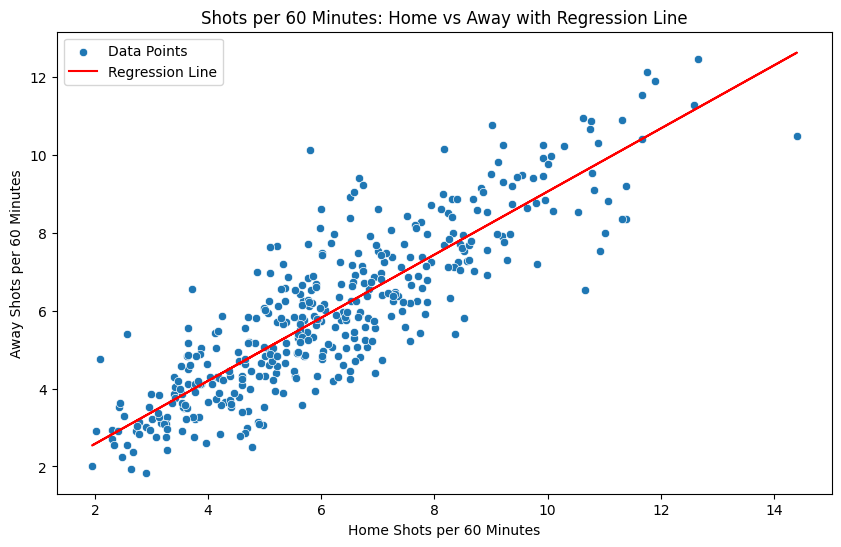

In [24]:
# Step 1: Identify Common Players
common_players = set(ind_h_df['player']).intersection(set(ind_a_df['player']))
print(f"Number of common players: {len(common_players)}")

# Step 2: Identify Mismatched Players
only_in_h = set(ind_h_df['player']) - set(ind_a_df['player'])
print(f"Players only in Home DataFrame: {only_in_h}")

only_in_a = set(ind_a_df['player']) - set(ind_h_df['player'])
print(f"Players only in Away DataFrame: {only_in_a}")

# Step 3: Drop Mismatched Players
ind_h_df_filtered = ind_h_df[ind_h_df['player'].isin(common_players)].reset_index(drop=True)
ind_a_df_filtered = ind_a_df[ind_a_df['player'].isin(common_players)].reset_index(drop=True)

print(f"Number of players after filtering: {len(ind_h_df_filtered)}")

# Step 4: Linear Regression
X = ind_h_df_filtered['shots/60'].values.reshape(-1, 1)
y = ind_a_df_filtered['shots/60'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ind_h_df_filtered['shots/60'], y=ind_a_df_filtered['shots/60'], label='Data Points')
plt.plot(ind_h_df_filtered['shots/60'], model.predict(X), color='red', label='Regression Line')
plt.title('Shots per 60 Minutes: Home vs Away with Regression Line')
plt.xlabel('Home Shots per 60 Minutes')
plt.ylabel('Away Shots per 60 Minutes')
plt.legend()
plt.show()

Adjusted Shots/60 for Home: 5.01
Adjusted Shots/60 for Away: 4.99
     player  neutral_shots/60 location  adjusted_shots/60
0  Player A               4.5     Home           4.605877
1  Player B               5.0     Away           4.986660
2  Player C               6.5     Home           6.225580
3  Player D               3.8     Away           3.504907


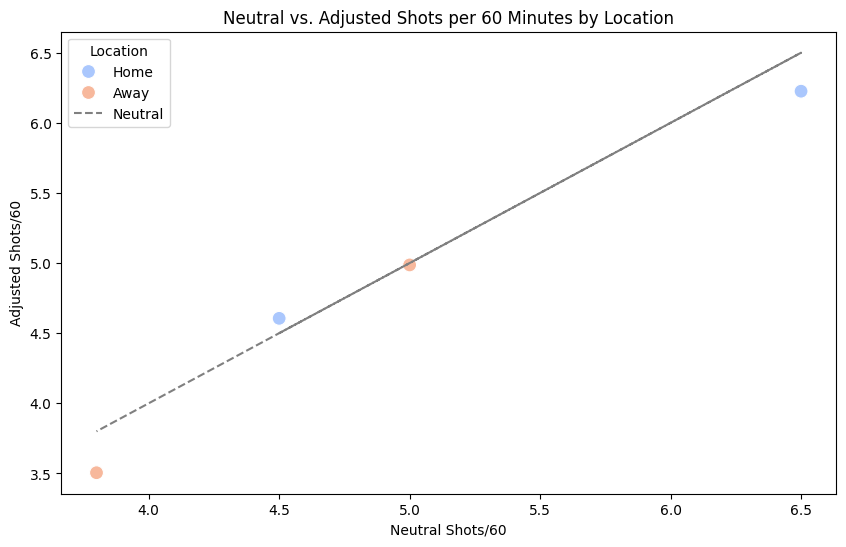

In [28]:
# ```sog_corr_calc.ipynb: apply_modifier```

def apply_modifier(neutral_shots_per_60, location, slope, intercept):
    location = location.lower()
    if location == 'home':
        adjusted_shots = slope * neutral_shots_per_60 + intercept
    elif location == 'away':
        if slope != 0:
            adjusted_shots = (neutral_shots_per_60 - intercept) / slope
        else:
            raise ValueError("Slope cannot be zero for adjustment.")
    else:
        raise ValueError("Location must be either 'Home' or 'Away'.")
    
    return adjusted_shots

# ```sog_corr_calc.ipynb: Applying the Modifier```

neutral_shots = 5.0
adjusted_home_shots = apply_modifier(neutral_shots, 'Home', slope, intercept)
adjusted_away_shots = apply_modifier(neutral_shots, 'Away', slope, intercept)
print(f"Adjusted Shots/60 for Home: {adjusted_home_shots:.2f}")
print(f"Adjusted Shots/60 for Away: {adjusted_away_shots:.2f}")

# ```sog_corr_calc.ipynb: Integrating Modifier with DataFrame```

df_neutral = pd.DataFrame({
    'player': ['Player A', 'Player B', 'Player C', 'Player D'],
    'neutral_shots/60': [4.5, 5.0, 6.5, 3.8],
    'location': ['Home', 'Away', 'Home', 'Away']
})

df_neutral['adjusted_shots/60'] = df_neutral.apply(
    lambda row: apply_modifier(
        neutral_shots_per_60=row['neutral_shots/60'],
        location=row['location'],
        slope=slope,
        intercept=intercept
    ),
    axis=1
)

print(df_neutral)

# ```sog_corr_calc.ipynb: Visualization```

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_neutral, x='neutral_shots/60', y='adjusted_shots/60', hue='location', palette='coolwarm', s=100)
plt.plot(df_neutral['neutral_shots/60'], df_neutral['neutral_shots/60'], color='gray', linestyle='--', label='Neutral')
plt.title('Neutral vs. Adjusted Shots per 60 Minutes by Location')
plt.xlabel('Neutral Shots/60')
plt.ylabel('Adjusted Shots/60')
plt.legend(title='Location')
plt.show()

In [25]:
# Filter out defensemen
merged_df = merged_df[merged_df['position_ind'] != 'D']

# Create scatter plot with 'toi_avg_ind' as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='icf_delta',
    y='shots/60',
    hue='toi_avg_ind',
    palette='viridis',
    size='toi_avg_ind',
    sizes=(40, 400),
    alpha=0.7
)
plt.title('Shots per 60 Minutes vs Corsi Delta (Individual) with TOI Avg')
plt.xlabel('Corsi Delta (iCF/60 - iFF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.legend(title='TOI Avg', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'merged_df' is not defined

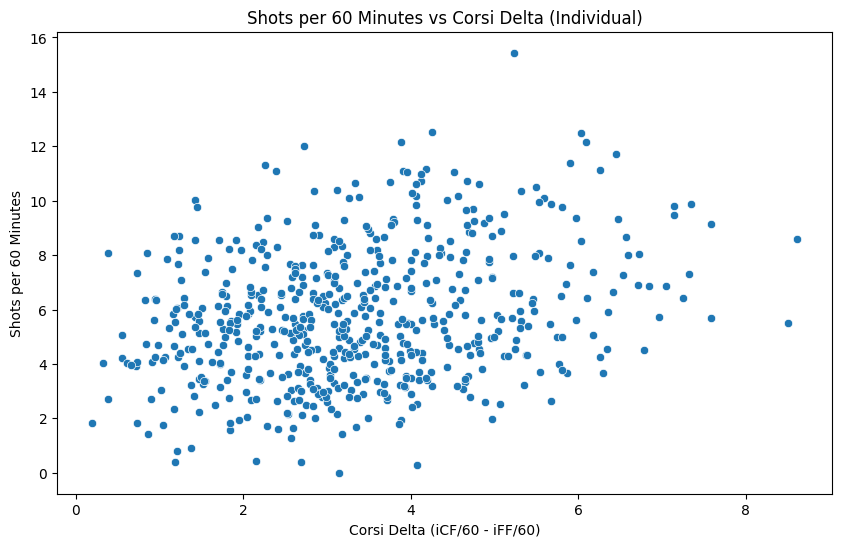

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_a_df, x='icf_delta', y='shots/60')
plt.title('Shots per 60 Minutes vs Corsi Delta (Individual)')
plt.xlabel('Corsi Delta (iCF/60 - iFF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.show()


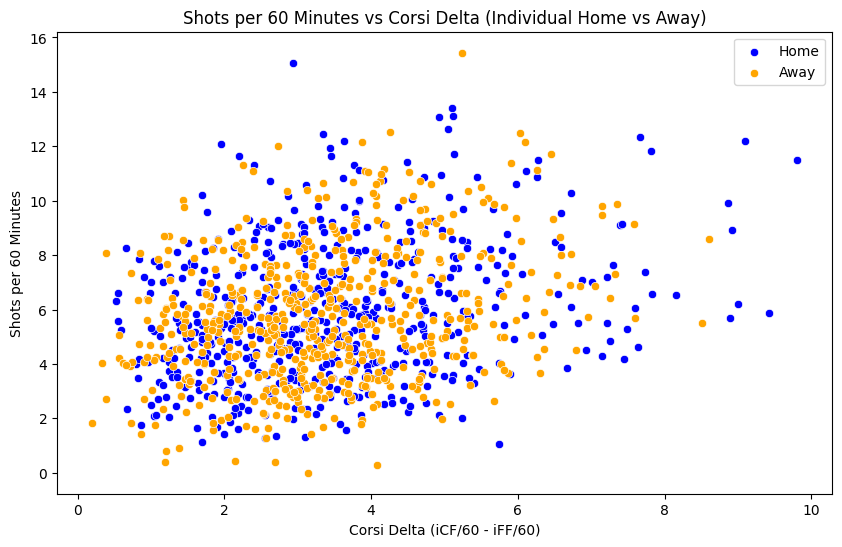

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ind_h_df, x='icf_delta', y='shots/60', label='Home', color='blue')
sns.scatterplot(data=ind_a_df, x='icf_delta', y='shots/60', label='Away', color='orange')
plt.title('Shots per 60 Minutes vs Corsi Delta (Individual Home vs Away)')
plt.xlabel('Corsi Delta (iCF/60 - iFF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.legend()
plt.show()


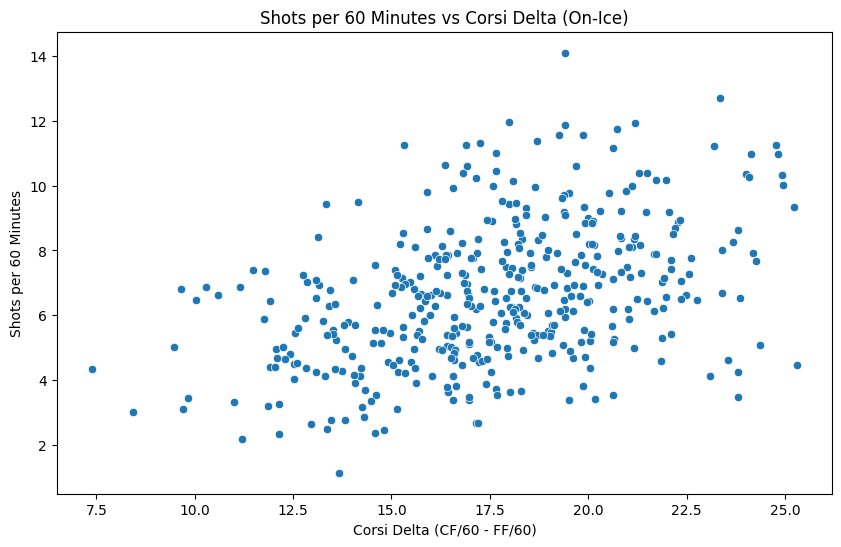

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='cf_delta', y='shots/60')
plt.title('Shots per 60 Minutes vs Corsi Delta (On-Ice)')
plt.xlabel('Corsi Delta (CF/60 - FF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.show()

In [11]:
correlation_icf = merged_df['shots/60'].corr(merged_df['icf_delta'])
print(f"Correlation between 'shots/60' and 'iCF Delta': {correlation_icf:.2f}")

correlation_cf = merged_df['shots/60'].corr(merged_df['cf_delta'])
print(f"Correlation between 'shots/60' and 'CF Delta': {correlation_cf:.2f}")


Correlation between 'shots/60' and 'iCF Delta': 0.56
Correlation between 'shots/60' and 'CF Delta': 0.43


In [13]:
# Check if 'shots/60' exists in the DataFrame
if 'shots/60' in merged_df.columns:
    # Select only numeric columns to avoid ValueError
    numeric_df = merged_df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix using only numeric columns
    correlation_matrix = numeric_df.corr()
else:
    print("The column 'shots/60' does not exist in the DataFrame.")

In [14]:
# Cell in[5]: Extract Correlations with 'shots/60'

if 'shots/60' in merged_df.columns:
    # Extract correlation coefficients for 'shots/60', excluding itself
    shots_corr = correlation_matrix['shots/60'].drop('shots/60').sort_values(ascending=False)
    
    # Display the correlation coefficients
    print("Correlation of each column with 'shots/60':")
    print(shots_corr)

Correlation of each column with 'shots/60':
iff/60                   0.943816
icf/60                   0.902600
iscf/60                  0.793150
ixg/60                   0.744219
sf/60                    0.697866
ff/60                    0.656556
sf%                      0.631090
cf/60                    0.629290
scf/60                   0.610251
xgf/60                   0.608611
ff%                      0.600778
rebounds_created/60      0.589577
xgf%                     0.580933
cf%                      0.574859
scf%                     0.572275
ldcf/60                  0.570181
hdcf/60                  0.569487
mdcf/60                  0.563781
icf_delta                0.556885
ldcf%                    0.540455
goals/60                 0.539780
mdcf%                    0.517896
off. zone_faceoffs/60    0.503560
total_points/60          0.483030
ihdcf/60                 0.479040
off. zone_faceoff_%      0.477039
gf/60                    0.464322
off. zone_starts/60      0.449843
cf_d

In [12]:
# Cell in[6]: Identify Most Correlated Column

if 'shots/60' in df.columns:
    # Find the column with the highest absolute correlation
    most_correlated_col = shots_corr.abs().idxmax()
    highest_corr_value = shots_corr[most_correlated_col]
    
    print(f"\nThe column most correlated with 'shots/60' is '{most_correlated_col}' with a correlation coefficient of {highest_corr_value:.2f}.")


The column most correlated with 'shots/60' is 'iff/60' with a correlation coefficient of 0.96.


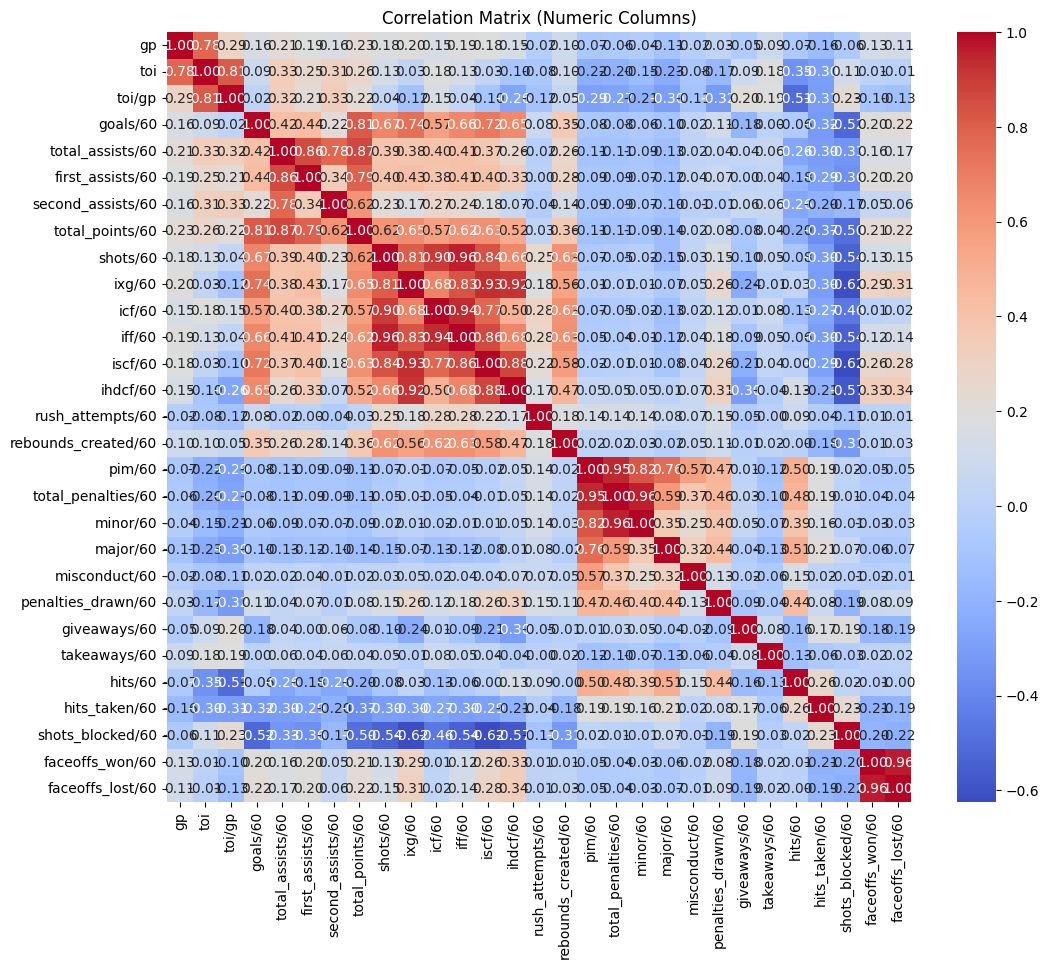

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

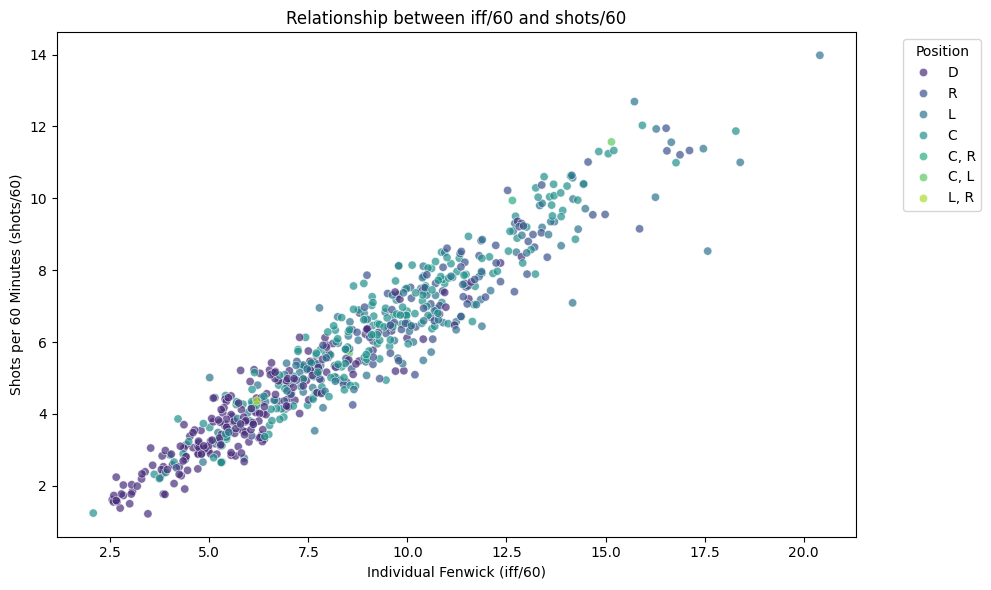

In [15]:

# Ensure that both 'iff/60' and 'shots/60' columns exist in the DataFrame
required_columns = ['iff/60', 'shots/60']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing in the DataFrame: {missing_columns}")
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='iff/60', y='shots/60', hue='position', palette='viridis', alpha=0.7)
    plt.title('Relationship between iff/60 and shots/60')
    plt.xlabel('Individual Fenwick (iff/60)')
    plt.ylabel('Shots per 60 Minutes (shots/60)')
    plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
from nst_scraper import nst_on_ice_scraper

In [21]:
individual_2023_df = nst_on_ice_scraper(fromseason=20232024, thruseason=20232024, startdate='', enddate='', sit='all', stdoi='std', pos='std', rate='y')
individual_2023_df.head()

,player,team,position,gp,toi,toi/gp,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%
0,Ryan Suter,DAL,D,82,1553.066667,18.939837,0.08,0.58,0.27,0.31,0.66,23.29,3.94,1.96,0.15,9.81,6.30,2.67,0.23,0.12,0.62,1.08,0.54,0.54,0.00,0.0,0.00,1.16,0.62,3.32,3.59,4.29,0.00,0.00,-
1,Jeff Carter,PIT,C,72,905.083333,12.570602,0.73,0.27,0.13,0.13,0.99,62.50,5.97,12.22,0.76,11.60,8.88,6.30,3.51,0.60,1.19,0.80,0.40,0.40,0.00,0.0,0.33,1.33,1.52,5.50,2.25,2.19,17.57,10.54,4.14
2,Zach Parise,COL,L,30,389.016667,12.967222,0.77,0.77,0.31,0.46,1.54,76.92,7.71,10.00,0.87,12.03,9.56,7.71,4.63,0.62,2.01,1.23,0.62,0.62,0.00,0.0,0.31,0.62,1.70,3.08,3.39,3.86,2.01,4.63,4.66
3,Brent Burns,CAR,D,82,1763.066667,21.500813,0.34,1.12,0.48,0.65,1.46,35.83,6.30,5.41,0.29,18.24,10.21,4.42,0.41,0.31,1.91,0.61,0.31,0.31,0.00,0.0,0.24,1.91,1.19,1.40,1.29,2.96,0.00,0.00,-
4,Corey Perry,"CHI, EDM",R,54,722.633333,13.382099,1.00,0.83,0.50,0.33,1.83,56.41,6.81,14.63,0.99,11.87,9.96,7.97,4.98,0.33,1.58,3.82,1.41,1.08,0.33,0.0,1.16,1.66,1.25,3.65,5.98,1.41,0.00,0.08,0.00


In [19]:
on_ice_2023_df = nst_on_ice_scraper(fromseason=20232024, thruseason=20232024, startdate='', enddate='', sit='all', stdoi='oi', pos='std', rate='y')
on_ice_2023_df.head()

,player,team,position,gp,toi,toi/gp,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%
0,Ryan Suter,DAL,D,82,1553.066667,18.939837,57.49,59.77,49.03,41.49,43.81,48.64,27.55,29.82,48.01,2.82,2.59,52.14,2.70,2.58,51.12,26.58,26.66,49.93,11.51,10.78,51.65,1.47,1.51,49.35,20.09,21.17,48.69,1.13,1.03,52.38,49.11,55.30,47.03,0.67,0.45,60.00,10.24,91.32,1.016,6.72,11.13,8.96,46.13,42.86,17.23,17.00,21.02,45.05
1,Jeff Carter,PIT,C,72,905.083333,12.570602,53.37,65.63,44.85,37.32,46.07,44.75,25.92,30.10,46.27,1.59,2.39,40.00,2.69,3.18,45.83,23.87,31.02,43.48,10.34,12.33,45.61,0.86,1.26,40.63,18.03,24.93,41.98,0.35,0.71,33.33,42.52,60.90,41.11,0.57,0.86,40.00,6.14,92.07,0.982,5.24,10.61,21.68,51.97,19.46,9.61,14.98,34.67,21.71
2,Zach Parise,COL,L,30,389.016667,12.967222,58.76,66.63,46.86,40.26,47.50,45.87,31.31,33.31,48.45,2.01,3.55,36.11,2.72,3.33,44.98,27.76,28.69,49.18,13.42,13.11,50.58,1.23,2.31,34.78,19.13,20.77,47.94,0.21,0.62,25.00,46.12,60.37,43.31,0.89,0.89,50.00,6.40,89.35,0.958,9.25,12.18,11.41,54.75,44.78,14.96,16.81,21.44,41.10
3,Brent Burns,CAR,D,82,1763.066667,21.500813,76.33,49.31,60.75,53.36,37.26,58.88,35.46,25.93,57.76,4.08,2.72,60.00,3.83,2.87,57.15,35.12,22.80,60.63,14.53,9.84,59.64,2.08,1.16,64.21,27.45,17.29,61.36,1.68,1.27,56.92,67.93,43.01,61.23,0.84,0.54,60.71,11.52,89.50,1.010,10.38,10.41,8.85,39.95,53.98,24.91,17.12,19.91,55.58
4,Corey Perry,"CHI, EDM",R,54,722.633333,13.382099,61.44,51.06,54.61,43.09,38.36,52.91,29.23,26.15,52.77,3.24,3.16,50.65,3.46,2.45,58.52,31.88,23.17,57.92,14.70,10.13,59.20,1.58,1.66,48.72,22.92,17.38,56.87,1.11,1.22,47.62,49.17,41.62,54.16,1.20,0.72,62.50,11.08,87.94,0.990,12.37,10.88,7.31,41.35,62.87,22.75,16.27,14.53,61.02


In [37]:
def merge_dataframes(individual_df, on_ice_df):
    """
    Merges individual and on-ice DataFrames on the 'player' column.

    Parameters:
        individual_df (pd.DataFrame): DataFrame containing individual player statistics.
        on_ice_df (pd.DataFrame): DataFrame containing on-ice player statistics.

    Returns:
        pd.DataFrame: Merged DataFrame.
    """
    merged_df = pd.merge(individual_df, on_ice_df, on='player', suffixes=('_ind', '_oi'))
    return merged_df

# Merge the DataFrames
merged_df = merge_dataframes(individual_2023_df, on_ice_2023_df)
merged_df.head()

,player,team_ind,position_ind,gp_ind,toi_ind,toi/gp_ind,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%,team_oi,position_oi,gp_oi,toi_oi,toi/gp_oi,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%
0,Ryan Suter,DAL,D,82,1553.066667,18.939837,0.08,0.58,0.27,0.31,0.66,23.29,3.94,1.96,0.15,9.81,6.30,2.67,0.23,0.12,0.62,1.08,0.54,0.54,0.00,0.0,0.00,1.16,0.62,3.32,3.59,4.29,0.00,0.00,-,DAL,D,82,1553.066667,18.939837,57.49,59.77,49.03,41.49,43.81,48.64,27.55,29.82,48.01,2.82,2.59,52.14,2.70,2.58,51.12,26.58,26.66,49.93,11.51,10.78,51.65,1.47,1.51,49.35,20.09,21.17,48.69,1.13,1.03,52.38,49.11,55.30,47.03,0.67,0.45,60.00,10.24,91.32,1.016,6.72,11.13,8.96,46.13,42.86,17.23,17.00,21.02,45.05
1,Jeff Carter,PIT,C,72,905.083333,12.570602,0.73,0.27,0.13,0.13,0.99,62.50,5.97,12.22,0.76,11.60,8.88,6.30,3.51,0.60,1.19,0.80,0.40,0.40,0.00,0.0,0.33,1.33,1.52,5.50,2.25,2.19,17.57,10.54,4.14,PIT,C,72,905.083333,12.570602,53.37,65.63,44.85,37.32,46.07,44.75,25.92,30.10,46.27,1.59,2.39,40.00,2.69,3.18,45.83,23.87,31.02,43.48,10.34,12.33,45.61,0.86,1.26,40.63,18.03,24.93,41.98,0.35,0.71,33.33,42.52,60.90,41.11,0.57,0.86,40.00,6.14,92.07,0.982,5.24,10.61,21.68,51.97,19.46,9.61,14.98,34.67,21.71
2,Zach Parise,COL,L,30,389.016667,12.967222,0.77,0.77,0.31,0.46,1.54,76.92,7.71,10.00,0.87,12.03,9.56,7.71,4.63,0.62,2.01,1.23,0.62,0.62,0.00,0.0,0.31,0.62,1.70,3.08,3.39,3.86,2.01,4.63,4.66,COL,L,30,389.016667,12.967222,58.76,66.63,46.86,40.26,47.50,45.87,31.31,33.31,48.45,2.01,3.55,36.11,2.72,3.33,44.98,27.76,28.69,49.18,13.42,13.11,50.58,1.23,2.31,34.78,19.13,20.77,47.94,0.21,0.62,25.00,46.12,60.37,43.31,0.89,0.89,50.00,6.40,89.35,0.958,9.25,12.18,11.41,54.75,44.78,14.96,16.81,21.44,41.10
3,Brent Burns,CAR,D,82,1763.066667,21.500813,0.34,1.12,0.48,0.65,1.46,35.83,6.30,5.41,0.29,18.24,10.21,4.42,0.41,0.31,1.91,0.61,0.31,0.31,0.00,0.0,0.24,1.91,1.19,1.40,1.29,2.96,0.00,0.00,-,CAR,D,82,1763.066667,21.500813,76.33,49.31,60.75,53.36,37.26,58.88,35.46,25.93,57.76,4.08,2.72,60.00,3.83,2.87,57.15,35.12,22.80,60.63,14.53,9.84,59.64,2.08,1.16,64.21,27.45,17.29,61.36,1.68,1.27,56.92,67.93,43.01,61.23,0.84,0.54,60.71,11.52,89.50,1.010,10.38,10.41,8.85,39.95,53.98,24.91,17.12,19.91,55.58
4,Corey Perry,"CHI, EDM",R,54,722.633333,13.382099,1.00,0.83,0.50,0.33,1.83,56.41,6.81,14.63,0.99,11.87,9.96,7.97,4.98,0.33,1.58,3.82,1.41,1.08,0.33,0.0,1.16,1.66,1.25,3.65,5.98,1.41,0.00,0.08,0.00,"CHI, EDM",R,54,722.633333,13.382099,61.44,51.06,54.61,43.09,38.36,52.91,29.23,26.15,52.77,3.24,3.16,50.65,3.46,2.45,58.52,31.88,23.17,57.92,14.70,10.13,59.20,1.58,1.66,48.72,22.92,17.38,56.87,1.11,1.22,47.62,49.17,41.62,54.16,1.20,0.72,62.50,11.08,87.94,0.990,12.37,10.88,7.31,41.35,62.87,22.75,16.27,14.53,61.02


In [33]:
# Columns from on_ice_2023_df
on_ice_columns = ['cf/60', 'ca/60', 'ff/60', 'fa/60', 'sf/60', 'sa/60']

# Ensure 'shots/60' exists after merge
if 'shots/60' not in merged_df.columns:
    raise ValueError("Column 'shots/60' not found in individual_2023_df after merging.")

# Select relevant columns
correlation_df = merged_df[['shots/60'] + on_ice_columns]
correlation_df.head()

,shots/60,cf/60,ca/60,ff/60,fa/60,sf/60,sa/60
0,3.94,57.49,59.77,41.49,43.81,27.55,29.82
1,5.97,53.37,65.63,37.32,46.07,25.92,30.10
2,7.71,58.76,66.63,40.26,47.50,31.31,33.31
3,6.30,76.33,49.31,53.36,37.26,35.46,25.93
4,6.81,61.44,51.06,43.09,38.36,29.23,26.15


In [35]:
def calculate_correlations(df, target_column, feature_columns):
    """
    Calculates Pearson correlation coefficients between the target column and feature columns.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        target_column (str): The column to correlate with.
        feature_columns (list): List of columns to compute correlation with the target.

    Returns:
        pd.Series: Correlation coefficients.
    """
    correlations = df[feature_columns].corrwith(df[target_column])
    return correlations

# Calculate correlations
correlations = calculate_correlations(correlation_df, 'shots/60', on_ice_columns)
print("Correlation coefficients with 'shots/60':")
print(correlations)

Correlation coefficients with 'shots/60':
cf/60    0.537578
ca/60   -0.299906
ff/60    0.512594
fa/60   -0.223440
sf/60    0.474760
sa/60   -0.162383
dtype: float64
